In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import os

from astropy.stats import sigma_clip
%matplotlib inline

In [2]:
channel = 'ch1'
planet = 'WASP-12b_old'
AOR_snip = 'r4'
addStack = True
datapath = '/home/taylor/Documents/Research/spitzer/'+planet+'/data/'+channel+'/'
plotpath = '/home/taylor/Documents/Research/spitzer/'+planet+'/analysis/FrameDiagnostics/'

nsigma = 3 #How bad does a value need to be before you clip it

plotpath = plotpath+channel
if addStack:
    plotpath = plotpath+'/addedStack/'
else:
    plotpath = plotpath+'/addedBlank/'

In [3]:
def load_data(path, AOR):
    pathflux  = path + 'flux'  + AOR + '.npy'
    pathbg    = path + 'bg'    + AOR + '.npy'
    pathxdata = path + 'xdata' + AOR + '.npy'
    pathydata = path + 'ydata' + AOR + '.npy'
    pathpsfwx = path + 'psfwx' + AOR + '.npy'
    pathpsfwy = path + 'psfwy' + AOR + '.npy'
    pathbeta  = path + 'beta'  + AOR + '.npy'
    
    flux  = np.load(pathflux )
    bg    = np.load(pathbg   )
    xdata = np.load(pathxdata)
    ydata = np.load(pathydata)
    psfwx = np.load(pathpsfwx)
    psfwy = np.load(pathpsfwy)
    beta  = np.load(pathbeta )
    
    return flux, bg, xdata, ydata, psfwx, psfwy, beta 

In [4]:
def sigclip(data, sigma=3, iters=5):
    new_data = sigma_clip(data, sigma=sigma, iters=iters)
    print(data.shape)
    print(np.where(data!=new_data)[0])
    return new_data

In [5]:
AOR = [a for a in os.listdir(datapath) if AOR_snip in a]

data1 = np.asarray(load_data(plotpath, AOR[0]))
data2 = load_data(plotpath, AOR[1])
data3 = load_data(plotpath, AOR[2])

nb_data = [len(data1[0]), len(data2[0]), len(data3[0])]

data1 = np.where(np.isfinite(data1), data1, 99999)
data2 = np.where(np.isfinite(data2), data2, 99999)
data3 = np.where(np.isfinite(data3), data3, 99999)

flux  = [sigclip(data1[0]), sigclip(data2[0]), sigclip(data3[0])]
bg    = [sigclip(data1[1]), sigclip(data2[1]), sigclip(data3[1])]
xdata = [sigclip(data1[2]), sigclip(data2[2]), sigclip(data3[2])]
ydata = [sigclip(data1[3]), sigclip(data2[3]), sigclip(data3[3])]
psfwx = [sigclip(data1[4]), sigclip(data2[4]), sigclip(data3[4])]
psfwy = [sigclip(data1[5]), sigclip(data2[5]), sigclip(data3[5])]
beta  = [sigclip(data1[6]), sigclip(data2[6]), sigclip(data3[6])]

(450, 64)
[  7   7  11  11  12  13  17  20  22  23  25  26  26  26  27  35  36  38
  40  46  46  47  50  50  50  55  57  57  59  61  66  76  78  82  82  90
  93  98  99 102 103 106 106 109 109 109 111 111 119 121 121 123 131 132
 132 133 134 137 139 142 143 144 147 147 147 147 147 148 149 149 149 153
 153 153 153 154 157 157 159 161 162 166 167 168 168 171 175 175 177 181
 182 184 185 189 191 193 195 198 198 200 200 202 204 211 211 212 212 213
 215 216 216 216 217 221 230 231 231 233 235 237 238 239 240 242 242 247
 249 251 255 256 258 259 263 264 266 269 269 269 270 272 272 273 275 282
 283 284 288 288 290 294 295 300 301 309 310 312 315 315 317 317 317 318
 318 319 322 323 328 328 330 330 331 332 332 334 336 337 339 340 342 342
 344 344 345 349 349 349 350 351 354 356 366 370 370 370 371 374 375 375
 376 376 376 379 381 385 389 389 400 402 404 405 406 407 407 407 408 409
 411 412 413 413 418 418 418 423 424 429 430 432 433 433 434 435 436 439
 439 440 442 443 445 447 448 448 449 449]

In [6]:
fluxval, bgval, xdataval, ydataval, psfwxval, psfwyval, betaval = np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), \
np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), np.empty((0,64))
fluxerr, bgerr, xdataerr, ydataerr, psfwxerr, psfwyerr, betaerr = np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), \
np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), np.empty((0,64))

In [7]:
def get_stats(data, median_arr, std_arr):
    for i in range(3):
        median = np.median(data[i], axis = 0)
        std    = np.ma.std(data[i], axis = 0)
        median_arr = np.append(median_arr, [median], axis = 0)
        std_arr    = np.append(std_arr, [std], axis = 0)
    return median_arr, std_arr

In [8]:
fluxval , fluxerr = get_stats(flux , fluxval, fluxerr)
bgval   , bgerr   = get_stats(bg   , bgval,   bgerr  )
xdataval, xdataerr= get_stats(xdata, xdataval, xdataerr)
ydataval, ydataerr= get_stats(ydata, ydataval, ydataerr)
psfwxval, psfwxerr= get_stats(psfwx, psfwxval, psfwxerr)
psfwyval, psfwyerr= get_stats(psfwy, psfwyval, psfwyerr)
betaval , betaerr = get_stats(beta , betaval , betaerr)

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [9]:
bgval[0,:]

array([2.57955208, 1.76555362, 1.41781828, 1.49962569, 1.49305856,
       1.44537901, 1.47225731, 1.47289069, 1.35917899, 1.36196424,
       1.29929202, 1.36361579, 1.31151719, 1.28187174, 1.14129555,
       1.22776814, 1.24450037, 1.22005267, 1.20015021, 1.12429773,
       1.10205482, 1.08614015, 1.08581505, 1.13409902, 1.05803435,
       1.06424928, 1.01745801, 1.04703581, 1.09228886, 0.99655404,
       1.0512763 , 0.95896882, 0.97036322, 0.97518005, 0.99406848,
       0.98999709, 0.90385951, 0.91618056, 0.99501365, 0.84585241,
       0.99431538, 0.88738445, 1.00256465, 0.88600746, 0.85475648,
       0.95179088, 0.87057329, 0.82651469, 0.87488938, 0.78178419,
       0.79862032, 0.89512598, 0.7769656 , 0.90343249, 0.77776894,
       0.96133268, 0.74778732, 0.82657518, 0.79699811, 0.78943227,
       0.80967397, 0.81956928, 0.8699597 , 0.73767894])

In [10]:
bgmed = np.nanmedian(bg[0], axis = 0)
flux[0]

masked_array(
  data=[[0.9731552057886752, 1.0018232577771258, 0.9870468338105278, ...,
         1.0116280696825994, 0.9902181793883958, 1.0166834032456151],
        [0.9823843044244647, 0.9988383944022043, 1.008245204134149, ...,
         1.008009329256811, 0.9787451204824918, 1.0016034768094868],
        [1.0250488940134248, 0.9866761870323779, 0.9950080676095496, ...,
         0.9704335583590326, 0.9997373744951705, 1.0072036067109245],
        ...,
        [0.9751587281452408, 1.0358817626853571, 0.9928073523062758, ...,
         1.0032930417287043, 1.001997587046915, 1.0267174218766375],
        [1.004419261822407, 1.0257713664285761, 1.022239158656708, ...,
         0.9970568738054318, 0.9974941503303192, 1.008867193691083],
        [0.9889745214655934, 1.0117069699625714, 0.9965538608347813, ...,
         0.9759912999387581, 1.0243167172553773, 0.9775874437890767]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],


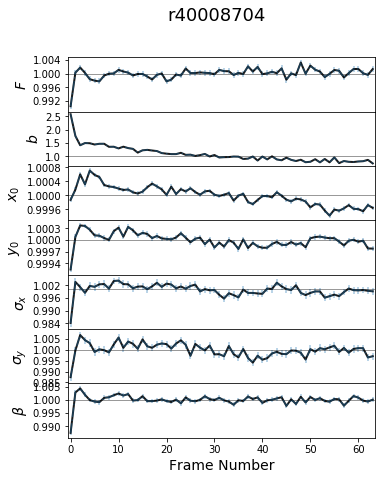

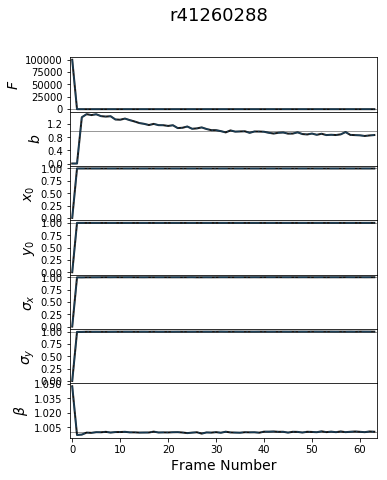

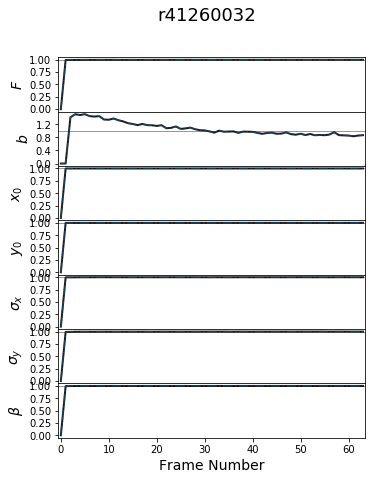

In [11]:
for i in range(3):
    nb = np.arange(64)
    fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,7))
    fig.suptitle(str(AOR[i]), fontsize=18)
    
    axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

    axes[0].errorbar(x = nb , y = fluxval[i,:] , yerr = fluxerr[i,:]/np.sqrt(nb_data[i]) , alpha=0.4, fmt='-.')
    axes[1].errorbar(x = nb , y = bgval[i,:]   , yerr = bgerr[i,:]/np.sqrt(nb_data[i])   , alpha=0.4, fmt='-.')
    axes[2].errorbar(x = nb , y = xdataval[i,:], yerr = xdataerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[3].errorbar(x = nb , y = ydataval[i,:], yerr = ydataerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[4].errorbar(x = nb , y = psfwxval[i,:], yerr = psfwyerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[5].errorbar(x = nb , y = psfwyval[i,:], yerr = psfwyerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[6].errorbar(x = nb , y = betaval[i,:] , yerr = betaerr[i,:]/np.sqrt(nb_data[i]) , alpha=0.4, fmt='-.')

    axes[0].plot(nb, fluxval[i,:] , color='k', linewidth=2, alpha=0.9)
    axes[1].plot(nb, bgval[i,:]   , color='k', linewidth=2, alpha=0.9)
    axes[2].plot(nb, xdataval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[3].plot(nb, ydataval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[4].plot(nb, psfwxval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[5].plot(nb, psfwyval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[6].plot(nb, betaval[i,:] , color='k', linewidth=2, alpha=0.9)
    
    #axes[1].set_ylim(0.95,1.05)
    
    
    axes[0].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[1].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[2].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[3].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[4].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[5].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[6].yaxis.set_major_locator(MaxNLocator(5,prune='both'))

    axes[0].set_ylabel(r'$F$', fontsize=14)
    axes[1].set_ylabel(r'$b$', fontsize=14)
    axes[2].set_ylabel(r'$x_0$', fontsize=14)
    axes[3].set_ylabel(r'$y_0$', fontsize=14)
    axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
    axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
    axes[6].set_ylabel(r'$\beta$', fontsize=14)
    
    axes[0].ticklabel_format(useOffset=False)
    axes[1].ticklabel_format(useOffset=False)
    axes[2].ticklabel_format(useOffset=False)
    axes[3].ticklabel_format(useOffset=False)
    axes[4].ticklabel_format(useOffset=False)
    axes[5].ticklabel_format(useOffset=False)
    axes[6].ticklabel_format(useOffset=False)
    
    axes[6].set_xlim(-0.5,63.5)
    axes[6].set_xlabel('Frame Number', fontsize=14)
    #fig.subplots_adjust(top=0.1)
    fig.subplots_adjust(hspace=0)
    fname = plotpath+'Frame_Diagnostics_'+ AOR[i]+'.pdf'
    fig.savefig(fname, bbox_inches='tight')

In [12]:
flux_all = np.empty((0, 64))
for i in range(3):
    flux_all = np.append(flux_all, flux[i], axis = 0)
    flux_all = sigma_clip(flux_all, sigma=4, iters=5)
    
bg_all = np.empty((0, 64))
for i in range(3):
    bg_all = np.append(bg_all, bg[i], axis = 0)
    bg_all = np.where(np.isfinite(bg_all), bg_all, 99999)
    bg_all = sigma_clip(bg_all, sigma=2, iters=2)
    
xdata_all = np.empty((0, 64))
for i in range(3):
    xdata_all = np.append(xdata_all, xdata[i], axis = 0)
    xdata_all = sigma_clip(xdata_all, sigma=4, iters=5)

ydata_all = np.empty((0, 64))
for i in range(3):
    ydata_all = np.append(ydata_all, ydata[i], axis = 0)
    ydata_all = sigma_clip(ydata_all, sigma=4, iters=5)
    
psfwx_all = np.empty((0, 64))
for i in range(3):
    psfwx_all = np.append(psfwx_all, psfwx[i], axis = 0)
    psfwx_all = sigma_clip(psfwx_all, sigma=4, iters=5)

psfwy_all = np.empty((0, 64))
for i in range(3):
    psfwy_all = np.append(psfwy_all, psfwy[i], axis = 0)
    psfwy_all = sigma_clip(psfwy_all, sigma=4, iters=5)
    
beta_all = np.empty((0, 64))
for i in range(3):
    beta_all = np.append(beta_all, beta[i], axis = 0)
    beta_all = sigma_clip(beta_all, sigma=4, iters=5)
    

In [13]:
flux_med, flux_err = np.ma.median(flux_all, axis = 0), np.std(flux_all, axis = 0)/1374
bg_med, bg_err = np.ma.median(bg_all, axis = 0), np.std(bg_all, axis = 0)/1374
xdata_med, xdata_err = np.median(xdata_all, axis = 0), np.std(xdata_all, axis = 0)/1374
ydata_med, ydata_err = np.median(ydata_all, axis = 0), np.std(ydata_all, axis = 0)/1374
psfwx_med, psfwx_err = np.median(psfwx_all, axis = 0), np.std(psfwx_all, axis = 0)/1374
psfwy_med, psfwy_err = np.median(psfwy_all, axis = 0), np.std(psfwy_all, axis = 0)/1374
beta_med, beta_err = np.median(beta_all, axis = 0), np.std(beta_all, axis = 0)/1374

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


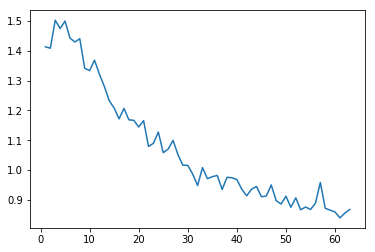

In [14]:
bgall = np.concatenate((bg[0], bg[1], bg[2]), axis=0)

bgmed, bgstd = np.ma.median(bg[1], axis = 0), np.ma.std(bgall, axis = 0)
plt.plot(bgmed)
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


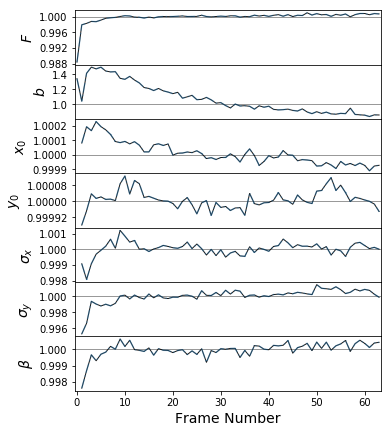

In [15]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,7))
    
axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].errorbar(x = nb , y = flux_med, yerr = flux_err , alpha=0.4, fmt='-.')
axes[1].errorbar(x = nb , y = bg_med, yerr = bg_err   , alpha=0.4, fmt='-.')
axes[2].errorbar(x = nb , y = xdata_med, yerr = xdata_err, alpha=0.4, fmt='-.')
axes[3].errorbar(x = nb , y = ydata_med, yerr = ydata_err, alpha=0.4, fmt='-.')
axes[4].errorbar(x = nb , y = psfwx_med, yerr = psfwy_err, alpha=0.4, fmt='-.')
axes[5].errorbar(x = nb , y = psfwy_med, yerr = psfwy_err, alpha=0.4, fmt='-.')
axes[6].errorbar(x = nb , y = beta_med, yerr = beta_err , alpha=0.4, fmt='-.')

axes[0].plot(nb, flux_med, color='k', linewidth=1, alpha=0.9)
axes[1].plot(nb, bg_med, color='k', linewidth=1, alpha=0.9)
axes[2].plot(nb, xdata_med, color='k', linewidth=1, alpha=0.9)
axes[3].plot(nb, ydata_med, color='k', linewidth=1, alpha=0.9)
axes[4].plot(nb, psfwx_med, color='k', linewidth=1, alpha=0.9)
axes[5].plot(nb, psfwy_med, color='k', linewidth=1, alpha=0.9)
axes[6].plot(nb, beta_med, color='k', linewidth=1, alpha=0.9)
    
    
axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[6].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel(r'$F$', fontsize=14)
axes[1].set_ylabel(r'$b$', fontsize=14)
axes[2].set_ylabel(r'$x_0$', fontsize=14)
axes[3].set_ylabel(r'$y_0$', fontsize=14)
axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
axes[6].set_ylabel(r'$\beta$', fontsize=14)

axes[0].ticklabel_format(useOffset=False)
axes[1].ticklabel_format(useOffset=False)
axes[2].ticklabel_format(useOffset=False)
axes[3].ticklabel_format(useOffset=False)
axes[4].ticklabel_format(useOffset=False)
axes[5].ticklabel_format(useOffset=False)
axes[6].ticklabel_format(useOffset=False)

axes[6].set_xlim(-0.5,63.5)
axes[6].set_xlabel('Frame Number', fontsize=14)
#fig.subplots_adjust(top=0.1)
fig.subplots_adjust(hspace=0)
fname = plotpath+'Frame_Diagnostics2.pdf'
fig.savefig(fname, bbox_inches='tight')

In [16]:
meanflux, sigmaflux = np.median(flux_med), np.std(flux_med)
meanbg, sigmabg = np.median(bg_med), np.std(bg_med)
meanxdata, sigmaxdata = np.median(xdata_med), np.std(xdata_med)
meanydata, sigmaydata = np.median(ydata_med), np.std(ydata_med)
meanpsfwx, sigmapsfwx = np.median(psfwx_med), np.std(psfwx_med)
meanpsfwy, sigmapsfwy = np.median(psfwy_med), np.std(psfwy_med)
meanbeta, sigmabeta = np.median(beta_med), np.std(beta_med)

flag = False
while(flag == False):
    index = np.where(flux_med < (meanflux - nsigma*sigmaflux))
    np.append(index, np.where(flux_med > (meanflux + nsigma*sigmaflux)))
    sigmaflux2 = np.std(np.delete(flux_med, index))
    flag = (sigmaflux2 == sigmaflux)
    sigmaflux = sigmaflux2


flag = False
while(flag == False):
    index = np.where(bg_med < (meanbg - nsigma*sigmabg))
    np.append(index, np.where(bg_med > (meanbg + nsigma*sigmabg)))
    sigmabg2 = np.std(np.delete(bg_med, index))
    flag = (sigmabg2 == sigmabg)
    sigmabg = sigmabg2
    
flag = False
while(flag == False):
    index = np.where(xdata_med < (meanxdata - nsigma*sigmaxdata))
    np.append(index, np.where(xdata_med > (meanxdata + nsigma*sigmaxdata)))
    sigmaxdata2 = np.std(np.delete(xdata_med, index))
    flag = (sigmaxdata2 == sigmaxdata)
    sigmaxdata = sigmaxdata2
    
flag = False
while(flag == False):
    index = np.where(ydata_med < (meanydata - nsigma*sigmaydata))
    np.append(index, np.where(ydata_med > (meanydata + nsigma*sigmaydata)))
    sigmaydata2 = np.std(np.delete(ydata_med, index))
    flag = (sigmaydata2 == sigmaydata)
    sigmaydata = sigmaydata2

flag = False
while(flag == False):
    index = np.where(psfwx_med < (meanpsfwx - nsigma*sigmapsfwx))
    np.append(index, np.where(psfwx_med > (meanpsfwx + nsigma*sigmapsfwx)))
    sigmapsfwx2 = np.std(np.delete(psfwx_med, index))
    flag = (sigmapsfwx2 == sigmapsfwx)
    sigmapsfwx = sigmapsfwx2
    
flag = False
while(flag == False):
    index = np.where(psfwy_med < (meanpsfwy - nsigma*sigmapsfwy))
    np.append(index, np.where(psfwy_med > (meanpsfwy + nsigma*sigmapsfwy)))
    sigmapsfwy2 = np.std(np.delete(psfwy_med, index))
    flag = (sigmapsfwy2 == sigmapsfwy)
    sigmapsfwy = sigmapsfwy2
    
flag = False
while(flag == False):
    index = np.where(beta_med < (meanbeta - nsigma*sigmabeta))
    np.append(index, np.where(beta_med > (meanbeta + nsigma*sigmabeta)))
    sigmabeta2 = np.std(np.delete(beta_med, index))
    flag = (sigmabeta2 == sigmabeta)
    sigmabeta = sigmabeta2

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:664: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [17]:
np.where(np.isnan(bg_all))

(array([], dtype=int64), array([], dtype=int64))

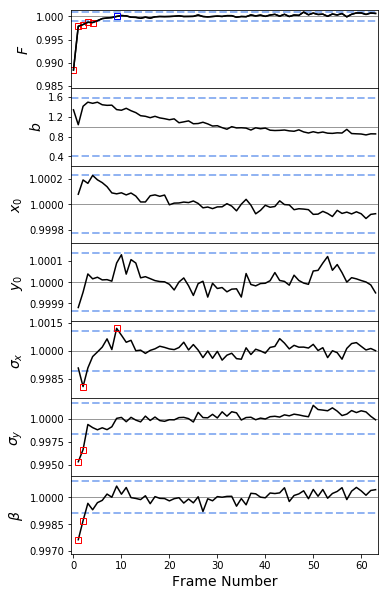

In [18]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,10))

axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].axhline(y= 1 + nsigma*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 + nsigma*sigmabg , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 + nsigma*sigmaxdata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 + nsigma*sigmaydata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 + nsigma*sigmapsfwx, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 + nsigma*sigmapsfwy, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[6].axhline(y= 1 + nsigma*sigmabeta , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

axes[0].axhline(y= 1 - nsigma*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 - nsigma*sigmabg   , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 - nsigma*sigmaxdata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 - nsigma*sigmaydata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 - nsigma*sigmapsfwx, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 - nsigma*sigmapsfwy, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[6].axhline(y= 1 - nsigma*sigmabeta , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

flux_markers = list(np.where(np.logical_or(flux_med<1-nsigma*sigmaflux, flux_med>1+nsigma*sigmaflux))[0])
bg_markers = list(np.where(np.logical_or(bg_med<1-nsigma*sigmabg, bg_med>1+nsigma*sigmabg))[0])
xdata_markers = list(np.where(np.logical_or(xdata_med<1-nsigma*sigmaxdata, xdata_med>1+nsigma*sigmaxdata))[0])
ydata_markers = list(np.where(np.logical_or(ydata_med<1-nsigma*sigmaydata, ydata_med>1+nsigma*sigmaydata))[0])
psfwx_markers = list(np.where(np.logical_or(psfwx_med<1-nsigma*sigmapsfwx, psfwx_med>1+nsigma*sigmapsfwx))[0])
psfwy_markers = list(np.where(np.logical_or(psfwy_med<1-nsigma*sigmapsfwy, psfwy_med>1+nsigma*sigmapsfwy))[0])
beta_markers = list(np.where(np.logical_or(beta_med<1-nsigma*sigmabeta, beta_med>1+nsigma*sigmabeta))[0])
flux_other_markers = np.concatenate((bg_markers, xdata_markers, ydata_markers, psfwx_markers, psfwy_markers, beta_markers))
flux_other_markers = list(np.setdiff1d(flux_other_markers, flux_markers).astype(int))
axes[0].plot(nb, flux_med , 'k', mec ='r', marker='s', markevery=flux_markers,fillstyle='none')
axes[0].plot(nb, flux_med , 'k', mec ='b', marker='s', markevery=flux_other_markers,fillstyle='none')
axes[1].plot(nb, bg_med   , 'k', mec ='r', marker='s', markevery=bg_markers,fillstyle='none')
axes[2].plot(nb, xdata_med, 'k', mec ='r', marker='s', markevery=xdata_markers,fillstyle='none')
axes[3].plot(nb, ydata_med, 'k', mec ='r', marker='s', markevery=ydata_markers,fillstyle='none')
axes[4].plot(nb, psfwx_med, 'k', mec ='r', marker='s', markevery=psfwx_markers,fillstyle='none')
axes[5].plot(nb, psfwy_med, 'k', mec ='r', marker='s', markevery=psfwy_markers,fillstyle='none')
axes[6].plot(nb, beta_med , 'k', mec ='r', marker='s', markevery=beta_markers,fillstyle='none')

#axes[0].set_ylim(0.99, 1.01)
axes[0].set_ylim(np.min([(np.min(flux_med)-1)*4/3+1, 1-(nsigma+1)*sigmaflux]), np.max([(np.max(flux_med)-1)*4/3+1, 1+(nsigma+1)*sigmaflux]))
axes[1].set_ylim(np.min([(np.min(bg_med)-1)*4/3+1, 1-(nsigma+1)*sigmabg]), np.max([(np.max(bg_med)-1)*4/3+1, 1+(nsigma+1)*sigmabg]))
axes[2].set_ylim(np.min([(np.min(xdata_med)-1)*4/3+1, 1-(nsigma+1)*sigmaxdata]), np.max([(np.max(xdata_med)-1)*4/3+1, 1+(nsigma+1)*sigmaxdata]))
axes[3].set_ylim(np.min([(np.min(ydata_med)-1)*4/3+1, 1-(nsigma+1)*sigmaydata]), np.max([(np.max(ydata_med)-1)*4/3+1, 1+(nsigma+1)*sigmaydata]))
axes[4].set_ylim(np.min([(np.min(psfwx_med)-1)*4/3+1, 1-(nsigma+1)*sigmapsfwx]), np.max([(np.max(psfwx_med)-1)*4/3+1, 1+(nsigma+1)*sigmapsfwx]))
axes[5].set_ylim(np.min([(np.min(psfwy_med)-1)*4/3+1, 1-(nsigma+1)*sigmapsfwy]), np.max([(np.max(psfwy_med)-1)*4/3+1, 1+(nsigma+1)*sigmapsfwy]))
axes[6].set_ylim(np.min([(np.min(beta_med)-1)*4/3+1, 1-(nsigma+1)*sigmabeta]), np.max([(np.max(beta_med)-1)*4/3+1, 1+(nsigma+1)*sigmabeta]))

axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[6].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel(r'$F$', fontsize=14)
axes[1].set_ylabel(r'$b$', fontsize=14)
axes[2].set_ylabel(r'$x_0$', fontsize=14)
axes[3].set_ylabel(r'$y_0$', fontsize=14)
axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
axes[6].set_ylabel(r'$\beta$', fontsize=14)

axes[0].ticklabel_format(useOffset=False)
axes[1].ticklabel_format(useOffset=False)
axes[2].ticklabel_format(useOffset=False)
axes[3].ticklabel_format(useOffset=False)
axes[4].ticklabel_format(useOffset=False)
axes[5].ticklabel_format(useOffset=False)
axes[6].ticklabel_format(useOffset=False)

axes[6].set_xlim(-0.5,63.5)
axes[6].set_xlabel('Frame Number', fontsize=14)
fig.subplots_adjust(hspace=0)
fname = plotpath + 'Frame_Diagnostics1.pdf'
fig.savefig(fname, bbox_inches='tight')

In [19]:
print(flux_markers)

[0, 1, 2, 3, 4]


In [20]:
'''blue  represents frames exhibiting unsually psf metric or background flux with usable photometry'''

'blue  represents frames exhibiting unsually psf metric or background flux with usable photometry'

In [21]:
print(((flux_med-1)/sigmaflux)[(flux_med-1)/sigmaflux > nsigma])
print(((flux_med-1)/sigmaflux)[(flux_med-1)/sigmaflux < -nsigma])

[]
[-33.984451690833616 -6.197815039472757 -5.101225709324706
 -3.667933979021363 -3.8336948649086247]
